In [ ]:
# '''
# Assuming you have a pandas OHLC Dataframe downloaded from Metatrader 5 historical data. 
# '''
# # Get the difference in price from previous step
# Data = pd.DataFrame(Data)
# delta = Data.iloc[:, 3].diff()
# delta = delta[1:]
# # Make the positive gains (up) and negative gains (down) Series
# up, down = delta.copy(), delta.copy()
# up[up < 0] = 0
# down[down > 0] = 0
# roll_up = pd.stats.moments.ewma(up, lookback)
# roll_down = pd.stats.moments.ewma(down.abs(), lookback)
# # Calculate the SMA
# roll_up = roll_up[lookback:]
# roll_down = roll_down[lookback:]
# Data = Data.iloc[lookback + 1:,].values
# # Calculate the RSI based on SMA
# RS = roll_up / roll_down
# RSI = (100.0 - (100.0 / (1.0 + RS)))
# RSI = np.array(RSI)
# RSI = np.reshape(RSI, (-1, 1))
# Data = np.concatenate((Data, RSI), axis = 1)   
---
#THIS IS OLD STYLE RSI GATHERING!

In [1]:
  
import pandas as pd 
import numpy as np
import yfinance
from IPython.display import HTML
import random
#from ipynb.fs.full.Functions1 import hide_toggle
#from operator import itemgetter 
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
#from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import pandas_datareader as pdr
import datetime as dt
import talib
from itertools import compress

In [75]:
symbol ="GC=F"
num_name= symbol.split(' ') 
df = []
for i in num_name:
        ticker = yfinance.Ticker(i)
        data=ticker.history(interval='1d',start="2019-01-01",end="2021-02-05")
        data['Date'] = pd.to_datetime(data.index) # just to crate another column for date!!!
        data['Date'] = data['Date'].apply(mpl_dates.date2num)
        data = data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
        ohlc_data= data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']].values
        df.append(data)

df[0]




,Date,Open,High,Low,Close
Date,,,,,
2018-12-31,17896.0,1278.000000,1281.300049,1277.599976,1278.300049
2019-01-02,17898.0,1286.000000,1286.000000,1277.599976,1281.000000
2019-01-03,17899.0,1286.800049,1292.000000,1286.699951,1291.800049
2019-01-04,17900.0,1294.199951,1294.199951,1275.300049,1282.699951
2019-01-07,17903.0,1286.800049,1286.800049,1286.599976,1286.800049
...,...,...,...,...,...
2021-01-29,18656.0,1842.000000,1876.000000,1838.699951,1847.300049
2021-02-01,18659.0,1866.599976,1871.900024,1850.000000,1860.800049
2021-02-02,18660.0,1859.599976,1861.300049,1827.599976,1830.500000


In [76]:
df[0]["RSI"]= talib.RSI(df[0]["Close"])
df[0]['BullishSignal'] = 0.0
df[0]['BearishSignal'] = 0.0

# data_frames_separate[0]['Signal'] = 0.0
# data_frames_separate[0]['Signal'] = np.where( (data_frames_separate[0]["RSI"]> 75) | (data_frames_separate[0]["RSI"] < 30), 1.0, 0.0)# buraya ekle bir sey sifir ver sadece rsi 70 ise gibi
# data_frames_separate[0]['Position'] = data_frames_separate[0]['Signal'].diff()
df[0]

,Date,Open,High,Low,Close,RSI,BullishSignal,BearishSignal
Date,,,,,,,,
2018-12-31,17896.0,1278.000000,1281.300049,1277.599976,1278.300049,NaN,0.0,0.0
2019-01-02,17898.0,1286.000000,1286.000000,1277.599976,1281.000000,NaN,0.0,0.0
2019-01-03,17899.0,1286.800049,1292.000000,1286.699951,1291.800049,NaN,0.0,0.0
2019-01-04,17900.0,1294.199951,1294.199951,1275.300049,1282.699951,NaN,0.0,0.0
2019-01-07,17903.0,1286.800049,1286.800049,1286.599976,1286.800049,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...
2021-01-29,18656.0,1842.000000,1876.000000,1838.699951,1847.300049,46.271639,0.0,0.0
2021-02-01,18659.0,1866.599976,1871.900024,1850.000000,1860.800049,50.305056,0.0,0.0
2021-02-02,18660.0,1859.599976,1861.300049,1827.599976,1830.500000,42.578978,0.0,0.0


In [85]:
lower_barrier = 43 # these are rules which can be modified according to ur rules!
upper_barrier = 70
width = 15
len(df[0]["RSI"])

524

In [86]:
#Remember that the fifth column Data[:, 4] refers to the RSI values calculated above.
# for i in range(len(df[0]['RSI'])):
#    print(df[0]["RSI"][i])

In [87]:
# Bullish Divergence
for i in range(len(df[0]['RSI'])):
    try:
        if df[0]["RSI"][i] < lower_barrier:
            
            for a in range(i + 1, i + width):
                if df[0]["RSI"][a] > lower_barrier:
                    
                    for r in range(a + 1, a + width):
                        if df[0]["RSI"][r] < lower_barrier and df[0]["RSI"][r] > df[0]["RSI"][i] and df[0]["Close"][r] < df[0]["Close"][i]:
                            #-----------------# I hope Data[r, 3]- refers to the close column(price)
                            for s in range(r + 1, r + width): 
                                if df[0]["RSI"][s] > lower_barrier:
                                    df[0]["BullishSignal"][s+1] = 1
                                    break
                                
                                else:
                                    continue
                        else:
                            continue
                    else:
                        continue
                else:
                    continue
                
    except IndexError:
        pass

In [88]:
# Bearish Divergence
for i in range(len(df[0]['RSI'])):
    
    try:
        if df[0]["RSI"][i] > upper_barrier:
            
            for a in range(i + 1, i + width): 
                if df[0]["RSI"][a] < upper_barrier:
                    
                    for r in range(a + 1, a + width):
                        if df[0]["RSI"][r] > upper_barrier and df[0]["RSI"][r] < df[0]["RSI"][i] and df[0]["Close"][r] > df[0]["Close"][i]:
                            
                            for s in range(r + 1, r + width):
                                if df[0]["RSI"][s] < upper_barrier:
                                    # do u need to have different columns! I think not but just to be on the same page!
                                    df[0]["BearishSignal"][s+1] = -1
                                    break
                                else:
                                    continue
                        else:
                            continue
                    else:
                        continue
                else:
                    continue
    except IndexError:
        pass

In [89]:
for i in df[0]["BearishSignal"]:
    if i == -1 or 0:
        print(i)

-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0


In [90]:
for i in df[0]["BullishSignal"]:
    if i ==1:
        print(i)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [91]:
def plotRsiDivergence(num):
  
  fig = plt.figure(figsize=(12,8))
  gs = gridspec.GridSpec(2, 1, height_ratios = [2,1])
    
  ax_rsi1= plt.subplot(gs[0])    
  plt.title(num_name[num])

  candlestick_ohlc(ax_rsi1,df[num].values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)
    
  ax_rsi= plt.subplot(gs[1],sharex=ax_rsi1)
# plot ‘buy’ signals
  ax_rsi1.plot(df[num][df[num]['BullishSignal'] == 1].index, 
             df[num]['Close'][df[num]['BullishSignal'] == 1], 
              '^', markersize = 10, color = 'g', label = 'buy')
# plot ‘sell’ signals
  ax_rsi1.plot(df[num][df[num]['BearishSignal'] == -1].index, 
             df[num]['Close'][df[num]['BearishSignal'] == -1], 
             'v', markersize = 10, color = 'r', label = 'sell')
    
  
  ax_rsi.plot(data.index, df[0]["RSI"])
  #ax_rsi.plot(data.index, df[0]["Rsi50"])
  #plt.fill_between(data.index,50,df[0]["RSI"]) 
  #plt.fill_between(data.index,50,df[0]["Rsi50"]) 


#   legend_labels= ["overbought", "oversold","rsi"]
#   ax_rsi.legend(legend_labels,loc = 2)

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax_rsi.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()
  fig.tight_layout()
  ax_rsi1.grid()
  #ax_rsi.grid()
# Removing the date labels and ticks from the price subplot:
  ax_rsi1.get_xaxis().set_visible(False)
# Removing the gap between the plots:
  fig.subplots_adjust(hspace=0)
# Adding a horizontal line at the zero level in the ROC subplot:
  ax_rsi.axhline(50, color = (.5, .5, .5), linestyle = '--', alpha = 0.5)
# We can add labels to both vertical axis:
  ax_rsi1.set_ylabel("Price ($)")
  ax_rsi.set_ylabel("% RSI")

# plot ‘sell’ signals
  ax_rsi.plot(df[num][df[num]['BearishSignal'] == -1].index, 
              df[num]['RSI'][df[num]['BearishSignal'] == -1], 
              'v', markersize = 10, color = 'r', label = 'sell')
# plot ‘buy’ signals
  ax_rsi.plot(df[num][df[num]['BullishSignal'] == 1].index, 
              df[num]['RSI'][df[num]['BullishSignal'] == 1], 
               '^', markersize = 10, color = 'g', label = 'buy')


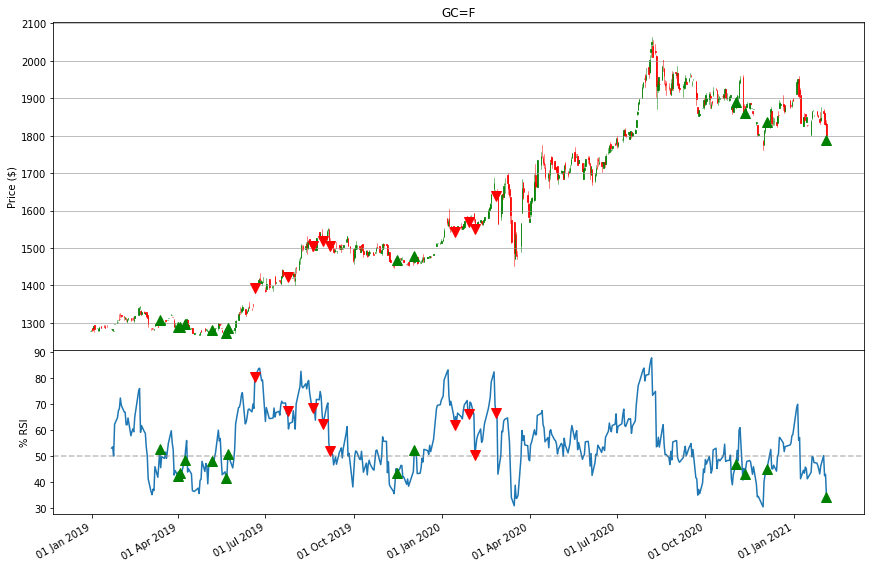

In [92]:
plotRsiDivergence(0)